# Ichimoku Cloud Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta


In [11]:
ticker="MSFT"
start_date="2024-01-01"
end_date="2025-05-13"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [12]:
display(data.head())

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,367.380615,372.363289,363.319185,370.342474,25258600
2024-01-03,367.113129,369.748105,365.042797,365.538092,23083500
2024-01-04,364.478149,369.589604,363.715405,367.182474,20901500
2024-01-05,364.289978,368.559424,363.051739,365.498501,20987000
2024-01-08,371.164673,371.669884,365.538121,365.825371,23134000


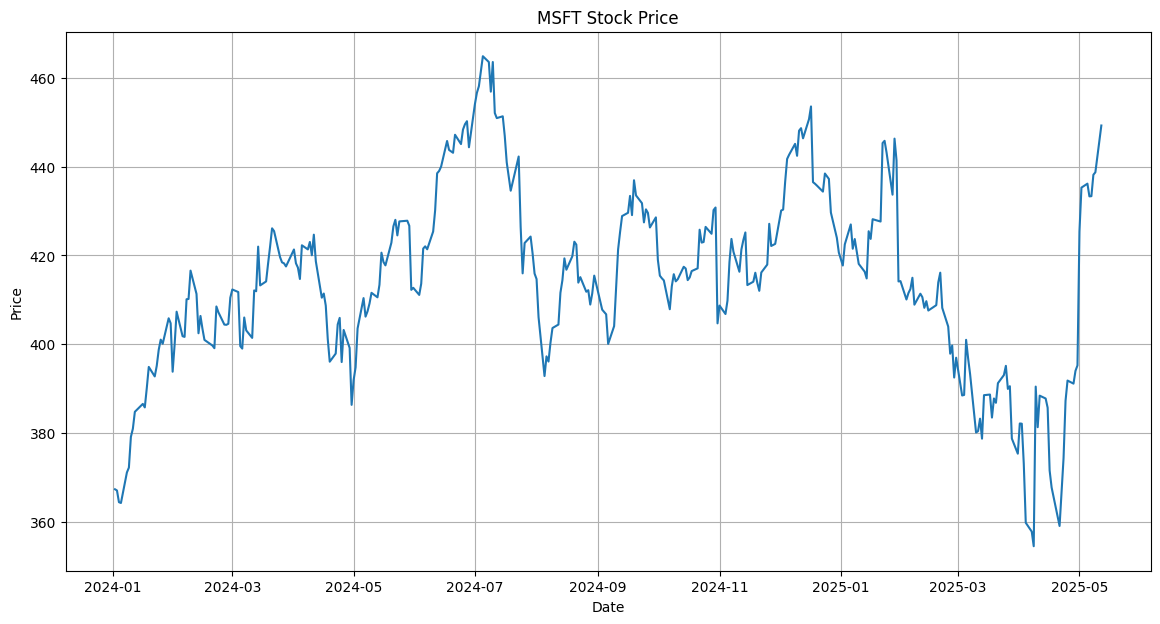

In [13]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Ichimoku Cloud (Ichimoku Kinko Hyo):

- ความหมาย: Ichimoku Cloud เป็นเครื่องมือที่ใช้ในการวิเคราะห์ทางเทคนิค ที่พัฒนาโดยนักข่าวชาวญี่ปุ่นชื่อ Goichi Hosoda ในช่วงปลายทศวรรษ 1930 และเผยแพร่ในปี 1969
- ลักษณะ: Ichimoku Cloud เป็นเครื่องมือที่ซับซ้อนกว่าเครื่องมืออื่น ๆ ประกอบด้วยเส้น 5 เส้นที่ใช้ในการระบุแนวโน้ม, แนวรับแนวต้าน, และสัญญาณซื้อขาย
- ส่วนประกอบ:
    1. Tenkan-sen (Conversion Line): (เส้นสีแดง) คำนวณจากค่าเฉลี่ยของราคาสูงสุดและราคาต่ำสุดในช่วง 9 วันที่ผ่านมา ( (9-day high + 9-day low) / 2 )
    2. Kijun-sen (Base Line): (เส้นสีน้ำเงิน) คำนวณจากค่าเฉลี่ยของราคาสูงสุดและราคาต่ำสุดในช่วง 26 วันที่ผ่านมา ( (26-day high + 26-day low) / 2 )
    3. Senkou Span A (Leading Span A): (เส้นนำหน้า A) คำนวณจากค่าเฉลี่ยของ Tenkan-sen และ Kijun-sen แล้ว Plot ไปข้างหน้า 26 วัน ( (Tenkan-sen + Kijun-sen) / 2 ) plotted 26 periods ahead
    4. Senkou Span B (Leading Span B): (เส้นนำหน้า B) คำนวณจากค่าเฉลี่ยของราคาสูงสุดและราคาต่ำสุดในช่วง 52 วันที่ผ่านมา แล้ว Plot ไปข้างหน้า 26 วัน ( (52-day high + 52-day low) / 2 ) plotted 26 periods ahead
    5. Chikou Span (Lagging Span): (เส้นตามหลัง) ราคาปิดปัจจุบัน Plot ไปข้างหลัง 26 วัน Current closing price plotted 26 periods behind
- เมฆ (Cloud): พื้นที่ระหว่าง Senkou Span A และ Senkou Span B
- การตีความ:
    - แนวโน้ม:
        - ถ้าราคาอยู่เหนือเมฆ แสดงว่าแนวโน้มเป็นขาขึ้น
        - ถ้าราคาอยู่ใต้เมฆ แสดงว่าแนวโน้มเป็นขาลง
        - ถ้าราคาอยู่ในเมฆ แสดงว่าแนวโน้มไม่ชัดเจน
    - แนวรับและแนวต้าน:
        - Senkou Span A และ Senkou Span B ทำหน้าที่เป็นแนวรับและแนวต้าน
        - ถ้า Senkou Span A อยู่เหนือ Senkou Span B เมฆจะมีสีเขียว (หรือสีที่กำหนด) และทำหน้าที่เป็นแนวรับ
        - ถ้า Senkou Span A อยู่ใต้ Senkou Span B เมฆจะมีสีแดง (หรือสีที่กำหนด) และทำหน้าที่เป็นแนวต้าน
    -  สัญญาณซื้อขาย:
        - Bullish Crossover: เมื่อ Tenkan-sen ตัดขึ้นเหนือ Kijun-sen
        - Bearish Crossover: เมื่อ Tenkan-sen ตัดลงต่ำกว่า Kijun-sen
        - ราคา Breakout เหนือเมฆ: เป็นสัญญาณซื้อที่แข็งแกร่ง
        - ราคา Breakdown ใต้เมฆ: เป็นสัญญาณขายที่แข็งแกร่ง
        - Chikou Span อยู่เหนือราคาในอดีต: เป็นสัญญาณยืนยันแนวโน้มขาขึ้น
        - Chikou Span อยู่ใต้ราคาในอดีต: เป็นสัญญาณยืนยันแนวโน้มขาลง

In [15]:
def plot_ichimoku_cloud(df, ticker):
    """
    Calculates and plots the Ichimoku Cloud for a given DataFrame of stock data.

    Args:
        df (pd.DataFrame): DataFrame containing at least 'High', 'Low', 'Close' columns,
                           and a DatetimeIndex.
        ticker (str): The stock ticker symbol for the chart title.
    """
    # Ensure the DataFrame has the necessary columns
    if not all(col in df.columns for col in ['High', 'Low', 'Close']):
        raise ValueError("DataFrame must contain 'High', 'Low', and 'Close' columns.")

    # Initialize the Ichimoku Indicator
    ichi = ta.trend.IchimokuIndicator(high=df['High'], low=df['Low'], window1=9,
                                     window2=26, window3=52)

    # Calculate Ichimoku Cloud components
    df['ichi_span_a'] = ichi.ichimoku_a()
    df['ichi_span_b'] = ichi.ichimoku_b()
    df['ichi_line'] = ichi.ichimoku_base_line()
    df['ichi_conversion'] = ichi.ichimoku_conversion_line()
    df['ichi_leading_span_a'] = ichi.ichimoku_a().shift(26)
    df['ichi_leading_span_b'] = ichi.ichimoku_b().shift(26)
    df['ichi_lagging_span'] = df['Close'].shift(-26)

    # Create the plot
    plt.figure(figsize=(16, 8))

    # Plot the closing price
    plt.plot(df.index, df['Close'], label='Close Price', color='black', alpha=0.8)

    # Plot the Ichimoku Cloud
    plt.plot(df.index, df['ichi_conversion'], label='Conversion Line (Tenkan-sen)', color='red', alpha=0.8)
    plt.plot(df.index, df['ichi_line'], label='Base Line (Kijun-sen)', color='blue', alpha=0.8)
    plt.plot(df.index, df['ichi_leading_span_a'], label='Leading Span A (Senkou Span A)', color='lime', alpha=0.8)
    plt.plot(df.index, df['ichi_leading_span_b'], label='Leading Span B (Senkou Span B)', color='magenta', alpha=0.8)
    plt.plot(df.index, df['ichi_lagging_span'], label='Lagging Span (Chikou Span)', color='purple', alpha=0.8)

    # Fill the Ichimoku Cloud area
    plt.fill_between(df.index, df['ichi_leading_span_a'], df['ichi_leading_span_b'],
                     where=df['ichi_leading_span_a'] >= df['ichi_leading_span_b'],
                     color='green', alpha=0.2, label='Kumo Cloud (Bullish)')
    plt.fill_between(df.index, df['ichi_leading_span_a'], df['ichi_leading_span_b'],
                     where=df['ichi_leading_span_a'] < df['ichi_leading_span_b'],
                     color='red', alpha=0.2, label='Kumo Cloud (Bearish)')

    # Add title and labels
    plt.title(f'{ticker} Ichimoku Cloud')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

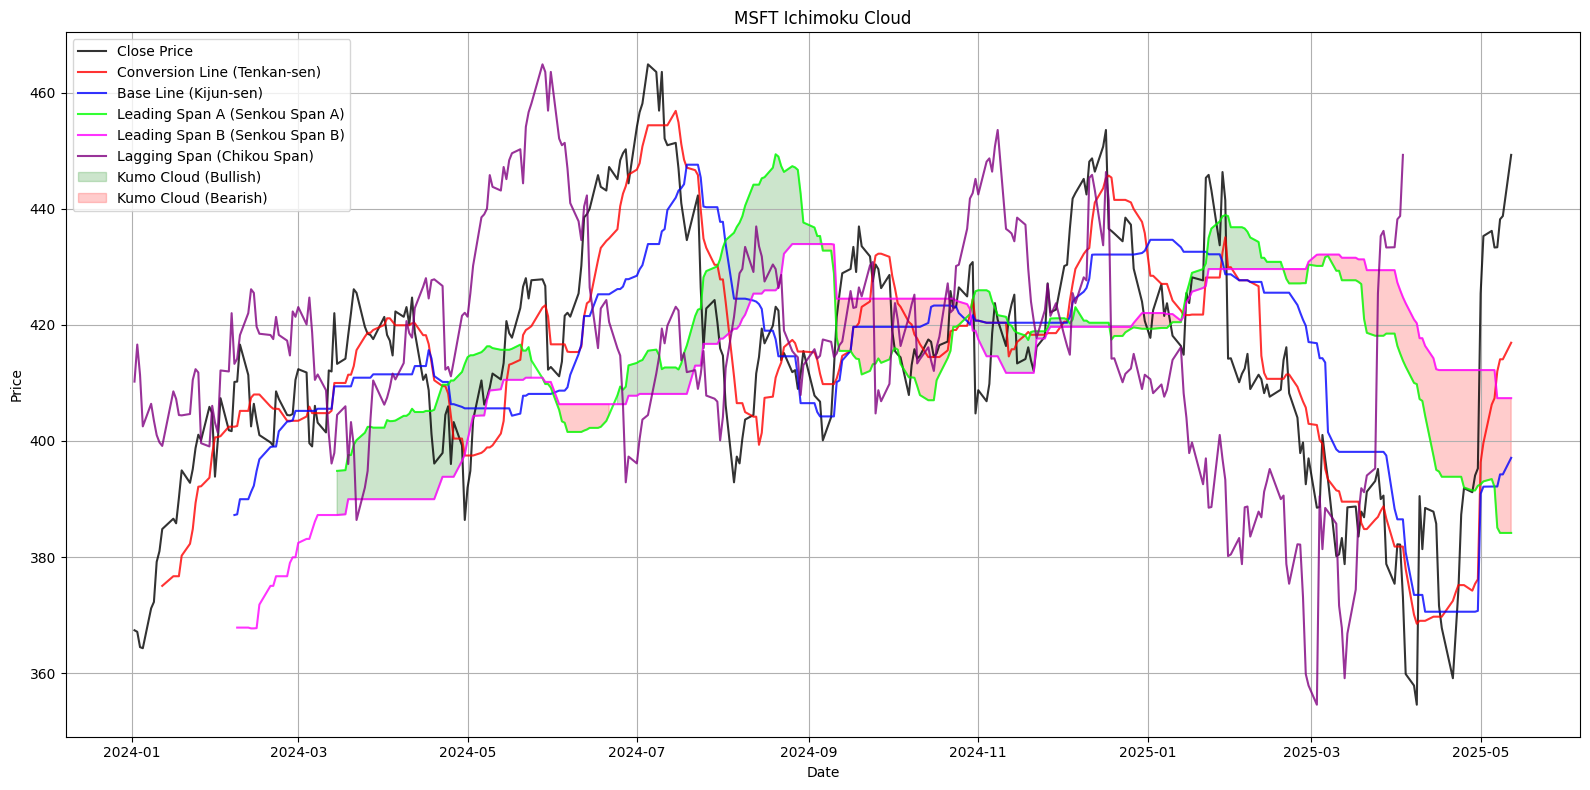

In [16]:
plot_ichimoku_cloud(data, ticker)